<a href="https://colab.research.google.com/github/AGPapa/chess/blob/main/python/Chess_Bitboard_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import chess.pgn

In [ ]:
import random
unif = random.Random(0)

unif.random()
# 0.8444218515250481 First number should be 

0.8444218515250481

In [ ]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

In [ ]:
# import tensorflow as tf
# !pip install tensorflow-gan
# import tensorflow_gan as tfgan

# print("Tensorflow version " + tf.__version__)

In [ ]:
# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# import re
# import numpy as np
# from matplotlib import pyplot as plt

Chess Bitboard:

6 Types of pieces: Pawn(P), Knight(N), Bishop(B), Rook(R), Queen(Q), King(K)

2 Colours: White(W) and Black(B)

Board consists of 64 squares

A Bitboard is represented by 12 (6 pieces x 2 colours) 64-bit numbers.



In [ ]:
# https://database.nikonoel.fr/
path = '/content/drive/My Drive/Chess NN/lichess_elite_2020-09.pgn'
pgns = open(path)

In [ ]:
first_game = chess.pgn.read_game(pgns)

In [ ]:
def count_iterable(i):
    return sum(1 for e in i)

In [ ]:
def int_to_bit_arr(str):
    num = int(str)
    return tf.convert_to_tensor(np.array(list(np.binary_repr(num, 64))).astype(np.float32))
print(int_to_bit_arr(5))

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.], shape=(64,), dtype=float32)


In [ ]:
def bitboard_to_layer(board):
    WP = board.pieces(chess.PAWN, chess.WHITE)
    WN = board.pieces(chess.KNIGHT, chess.WHITE)
    WB = board.pieces(chess.BISHOP, chess.WHITE)
    WR = board.pieces(chess.ROOK, chess.WHITE)
    WQ = board.pieces(chess.QUEEN, chess.WHITE)
    WK = board.pieces(chess.KING, chess.WHITE)

    BP = board.pieces(chess.PAWN, chess.BLACK)
    BN = board.pieces(chess.KNIGHT, chess.BLACK)
    BB = board.pieces(chess.BISHOP, chess.BLACK)
    BR = board.pieces(chess.ROOK, chess.BLACK)
    BQ = board.pieces(chess.QUEEN, chess.BLACK)
    BK = board.pieces(chess.KING, chess.BLACK)

    bitboard = [WP, WN, WB, WR, WQ, WK, BP, BN, BB, BR, BQ, BK]
    results = map(int_to_bit_arr, bitboard)  
    tensor = tf.convert_to_tensor(list(results), dtype=tf.float32)  
    return tf.transpose(tensor)

In [ ]:
def layer_to_bitboard(tensor):
    trans = tf.transpose(tensor)

    # WP = board.pieces(chess.PAWN, chess.WHITE)
    # WN = board.pieces(chess.KNIGHT, chess.WHITE)
    # WB = board.pieces(chess.BISHOP, chess.WHITE)
    # WR = board.pieces(chess.ROOK, chess.WHITE)
    # WQ = board.pieces(chess.QUEEN, chess.WHITE)
    # WK = board.pieces(chess.KING, chess.WHITE)

    # BP = board.pieces(chess.PAWN, chess.BLACK)
    # BN = board.pieces(chess.KNIGHT, chess.BLACK)
    # BB = board.pieces(chess.BISHOP, chess.BLACK)
    # BR = board.pieces(chess.ROOK, chess.BLACK)
    # BQ = board.pieces(chess.QUEEN, chess.BLACK)
    # BK = board.pieces(chess.KING, chess.BLACK)

    # bitboard = [WP, WN, WB, WR, WQ, WK, BP, BN, BB, BR, BQ, BK]
    # results = map(int_to_bit_arr, bitboard)  
    # tensor = tf.convert_to_tensor(list(results), dtype=tf.float32)  
    return board

In [ ]:
def get_random_board():
    global pgns
    curr_game = chess.pgn.read_game(pgns)
    if curr_game is None:
        pgns = open(path)
    num_moves = count_iterable(curr_game.main_line())
    rand_num = num_moves * unif.random()
    i = 0
    curr_board = curr_game.board()
    for move in curr_game.main_line():
        if i >= rand_num:
            break
        i = i+1
        curr_board.push(move)
    return curr_board

In [ ]:
pgns = open(path)
print(bitboard_to_layer(get_random_board()))


tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

In [ ]:
count_iterable(first_game.main_line())

41

[]


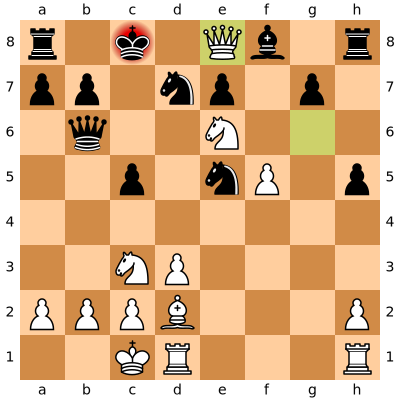

In [ ]:
# print(first_game.end())
x = first_game.end()
print(x.variations)
x.board()

In [ ]:
board = first_game.board()

In [ ]:
first_game.__dict__

{'board_cached': None,
 'comment': '',
 'errors': [],
 'headers': Headers(Event='Rated Blitz game', Site='?', Date='2020.09.01', Round='-', White='Napo18', Black='Nice_Ice_Eyes', Result='1-0', BlackElo='2377', BlackRatingDiff='-3', ECO='B01', LichessURL='https://lichess.org/cZ6UM7D3', Opening='Scandinavian Defense: Main Line', Termination='Normal', TimeControl='180+0', UTCDate='2020.09.01', UTCTime='00:00:50', WhiteElo='2558', WhiteRatingDiff='+3'),
 'move': None,
 'nags': set(),
 'parent': None,
 'starting_comment': '',
 'variations': [<chess.pgn.GameNode at 0x7f9df66838d0>]}

# Layers


In [ ]:
import tensorflow.compat.v1 as tf
!pip install tensorflow-gan
import tensorflow_gan as tfgan
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def _dense(inputs, units, l2_weight):
  return tf.layers.dense(
      inputs, units, None,
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))

def _batch_norm(inputs, is_training):
  return tf.layers.batch_normalization(
      inputs, momentum=0.999, epsilon=0.001, training=is_training)

def _deconv2d(inputs, filters, kernel_size, stride, l2_weight):
  return tf.layers.conv2d_transpose(
      inputs, filters, [kernel_size, kernel_size], strides=[stride, stride], 
      activation=tf.nn.relu, padding='same',
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))

def _conv2d(inputs, filters, kernel_size, stride, l2_weight):
  return tf.layers.conv2d(
      inputs, filters, [kernel_size, kernel_size], strides=[stride, stride], 
      activation=None, padding='same',
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))

In [ ]:
_leaky_relu = lambda net: tf.nn.leaky_relu(net, alpha=0.01)

In [ ]:
def unconditional_generator(noise, mode, weight_decay=2.5e-5):
  """Generator to produce unconditional MNIST images."""
  is_training = (mode == tf.estimator.ModeKeys.TRAIN)

  #(50, 1)
  net = _dense(noise, 1024, weight_decay)
  #(50, 1024)
  net = _batch_norm(net, is_training)
  #(50, 1024)
  net = tf.nn.relu(net)
  #(50, 1024)
  
  net = _dense(net, 8 * 8 * 256, weight_decay)
  #(50, 16384)
  net = _batch_norm(net, is_training)
  #(50, 16384)
  net = tf.nn.relu(net)
  #(50, 16384)
  
  net = tf.reshape(net, [-1, 8, 8, 256])
  #(50, 8, 8, 256)
  net = _deconv2d(net, 64, 4, 2, weight_decay)
  #(50, 16, 16, 64)
  net = _deconv2d(net, 64, 4, 2, weight_decay)
  #(50, 32, 32, 64)
  # Make sure that generator output is in the same range as `inputs`
  # ie [-1, 1].
  net = _conv2d(net, 12, 4, 4, 0.0)
  #(50, 8, 8, 12)
  net = tf.tanh(net)
  #(50, 8, 8, 12)

  net = tf.where(net > 0.01, net, tf.zeros_like(net))

#   net = tf.clip_by_value(net, clip_value_min=0, clip_value_max=1)

  net = tf.reshape(net, [-1, 64, 12])
  #(50, 64, 12)

  return net

In [ ]:
def unconditional_discriminator(img, unused_conditioning, mode, weight_decay=2.5e-5):
  del unused_conditioning
  is_training = (mode == tf.estimator.ModeKeys.TRAIN)

  #(50, 64, 12)
  net = tf.reshape(img, [-1, 8, 8, 12])
  #(50, 8, 8, 12)
  net = _conv2d(net, 64, 4, 2, weight_decay)
  net = _leaky_relu(net)

  net = _conv2d(net, 128, 4, 2, weight_decay)
  net = _leaky_relu(net)

  net = tf.layers.flatten(net)

  net = _dense(net, 1024, weight_decay)
  net = _batch_norm(net, is_training)
  net = _leaky_relu(net)

  net = _dense(net, 1, weight_decay)

  return net

# GAN

In [ ]:
train_batch_size = 32 #@param
noise_dimensions = 1 #@param
generator_lr = 0.001 #@param
discriminator_lr = 0.0002 #@param

def gen_opt():
  gstep = tf.train.get_or_create_global_step()
  base_lr = generator_lr
  # Halve the learning rate at 1000 steps.
  lr = tf.cond(gstep < 1000, lambda: base_lr, lambda: base_lr / 2.0)
  return tf.train.AdamOptimizer(lr, 0.5)

gan_estimator = tfgan.estimator.GANEstimator(
    generator_fn=unconditional_generator,
    discriminator_fn=unconditional_discriminator,
    generator_loss_fn=tfgan.losses.wasserstein_generator_loss,
    discriminator_loss_fn=tfgan.losses.wasserstein_discriminator_loss,
    params={'batch_size': train_batch_size, 'noise_dims': noise_dimensions},
    generator_optimizer=gen_opt,
    discriminator_optimizer=tf.train.AdamOptimizer(discriminator_lr, 0.5))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt6g7vbr9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt6g7vbr9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
def input_fn(mode, params):
  assert 'batch_size' in params
  assert 'noise_dims' in params
  bs = params['batch_size']
  nd = params['noise_dims']
  split = 'train' if mode == tf.estimator.ModeKeys.TRAIN else 'test'
  shuffle = (mode == tf.estimator.ModeKeys.TRAIN)
  just_noise = (mode == tf.estimator.ModeKeys.PREDICT)
  
  noise_ds = (tf.data.Dataset.from_tensors(0).repeat()
              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))
    
  if just_noise:
    return noise_ds


  pgns = open(path)
  tmp = [bitboard_to_layer(get_random_board()) for _ in range(bs)]

  x = tf.data.Dataset.from_tensors(tmp)

  return tf.data.Dataset.zip((noise_ds, x))

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.08 min
Trained from step 0 to 500 in 100.91 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:26Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:26Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.53566s


INFO:tensorflow:Inference Time : 0.53566s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:27


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:27


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.010239633, generator_loss = 0.052406844, global_step = 0, loss = 0.010239633


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.010239633, generator_loss = 0.052406844, global_step = 0, loss = 0.010239633


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.20 min
Trained from step 500 to 1000 in 102.44 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:33Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:33Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.53136s


INFO:tensorflow:Inference Time : 0.53136s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:33


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:33


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.009777842, generator_loss = 0.052406844, global_step = 0, loss = 0.009777842


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.009777842, generator_loss = 0.052406844, global_step = 0, loss = 0.009777842


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.32 min
Trained from step 1000 to 1500 in 97.28 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:40Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:40Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.53916s


INFO:tensorflow:Inference Time : 0.53916s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:41


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:41


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.015620066, generator_loss = 0.052401412, global_step = 0, loss = 0.015620066


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.015620066, generator_loss = 0.052401412, global_step = 0, loss = 0.015620066


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.43 min
Trained from step 1500 to 2000 in 104.80 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:47Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:47Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.53770s


INFO:tensorflow:Inference Time : 0.53770s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:47


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:47


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.014578821, generator_loss = 0.052406844, global_step = 0, loss = 0.014578821


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.014578821, generator_loss = 0.052406844, global_step = 0, loss = 0.014578821


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.55 min
Trained from step 2000 to 2500 in 96.67 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:54Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:32:54Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.54940s


INFO:tensorflow:Inference Time : 0.54940s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:54


INFO:tensorflow:Finished evaluation at 2020-11-01-19:32:54


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.010138543, generator_loss = 0.052406844, global_step = 0, loss = 0.010138543


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.010138543, generator_loss = 0.052406844, global_step = 0, loss = 0.010138543


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.66 min
Trained from step 2500 to 3000 in 102.56 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:01Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:01Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.55170s


INFO:tensorflow:Inference Time : 0.55170s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:01


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:01


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.0077410154, generator_loss = 0.052406397, global_step = 0, loss = 0.0077410154


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.0077410154, generator_loss = 0.052406397, global_step = 0, loss = 0.0077410154


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.78 min
Trained from step 3000 to 3500 in 103.40 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:07Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:07Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.52275s


INFO:tensorflow:Inference Time : 0.52275s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:08


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:08


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.009042669, generator_loss = 0.052399844, global_step = 0, loss = 0.009042669


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.009042669, generator_loss = 0.052399844, global_step = 0, loss = 0.009042669


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 0.90 min
Trained from step 3500 to 4000 in 95.80 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:15Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:15Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.54427s


INFO:tensorflow:Inference Time : 0.54427s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:15


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:15


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.0077600963, generator_loss = 0.05240746, global_step = 0, loss = 0.0077600963


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.0077600963, generator_loss = 0.05240746, global_step = 0, loss = 0.0077600963


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 1.01 min
Trained from step 4000 to 4500 in 105.42 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:21Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:21Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.55533s


INFO:tensorflow:Inference Time : 0.55533s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:22


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:22


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.01330994, generator_loss = 0.052406427, global_step = 0, loss = 0.01330994


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.01330994, generator_loss = 0.052406427, global_step = 0, loss = 0.01330994


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt6g7vbr9/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Loss for final step: None.


INFO:tensorflow:Loss for final step: None.


Time since start: 1.12 min
Trained from step 4500 to 5000 in 107.61 steps / sec
Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:28Z


INFO:tensorflow:Starting evaluation at 2020-11-01T19:33:28Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.53328s


INFO:tensorflow:Inference Time : 0.53328s


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:29


INFO:tensorflow:Finished evaluation at 2020-11-01-19:33:29


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.012446736, generator_loss = 0.052406844, global_step = 0, loss = 0.012446736


INFO:tensorflow:Saving dict for global step 0: discriminator_loss = 0.012446736, generator_loss = 0.052406844, global_step = 0, loss = 0.012446736


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: /tmp/tmpt6g7vbr9/model.ckpt-0


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code:

              .map(lambda _: tf.random.normal([bs, nd], dtype=tf.dtypes.float32)))

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Restoring parameters from /tmp/tmpt6g7vbr9/model.ckpt-0


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (20, 64, 1

ValueError: ignored

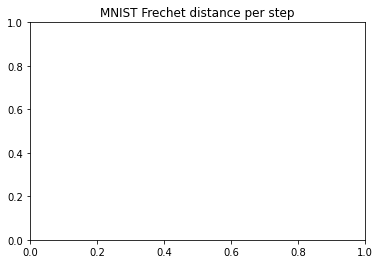

In [ ]:
tf.autograph.set_verbosity(0, False)

import time
steps_per_eval = 500 #@param
max_train_steps = 5000 #@param
batches_for_eval_metrics = 100 #@param

# Used to track metrics.
steps = []
real_logits, fake_logits = [], []
real_mnist_scores, mnist_scores, frechet_distances = [], [], []

cur_step = 0
start_time = time.time()
while cur_step < max_train_steps:
  next_step = min(cur_step + steps_per_eval, max_train_steps)

  start = time.time()
  gan_estimator.train(input_fn, max_steps=next_step)
  steps_taken = next_step - cur_step
  time_taken = time.time() - start
  print('Time since start: %.2f min' % ((time.time() - start_time) / 60.0))
  print('Trained from step %i to %i in %.2f steps / sec' % (
      cur_step, next_step, steps_taken / time_taken))
  cur_step = next_step
  
  # Calculate some metrics.
  metrics = gan_estimator.evaluate(input_fn, steps=batches_for_eval_metrics)
  steps.append(cur_step)
#   {'discriminator_loss': 0.034386866, 'generator_loss': 0.05245331, 'loss': 0.034386866, 'global_step': 0}

#   real_logits.append(metrics['real_data_logits'])
#   fake_logits.append(metrics['gen_data_logits'])
#   real_mnist_scores.append(metrics['real_mnist_score'])
#   mnist_scores.append(metrics['mnist_score'])
#   frechet_distances.append(metrics['frechet_distance'])
#   print('Average discriminator output on Real: %.2f  Fake: %.2f' % (
#       real_logits[-1], fake_logits[-1]))
#   print('Inception Score: %.2f / %.2f  Frechet Distance: %.2f' % (
#       mnist_scores[-1], real_mnist_scores[-1], frechet_distances[-1]))
  
  # Vizualize some images.
  iterator = gan_estimator.predict(
      input_fn, hooks=[tf.train.StopAtStepHook(num_steps=21)])
  try:
    imgs = np.array([next(iterator) for _ in range(20)])
  except StopIteration:
    pass

  print(imgs, imgs.shape)

#   tiled = tfgan.eval.python_image_grid(imgs, grid_shape=(2, 10))
#   plt.axis('off')
#   plt.imshow(np.squeeze(tiled))
#   plt.show()
  
  
# Plot the metrics vs step.
plt.title('MNIST Frechet distance per step')
plt.plot(steps, frechet_distances)
plt.figure()
plt.title('MNIST Score per step')
plt.plot(steps, mnist_scores)
plt.plot(steps, real_mnist_scores)
plt.show()